<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

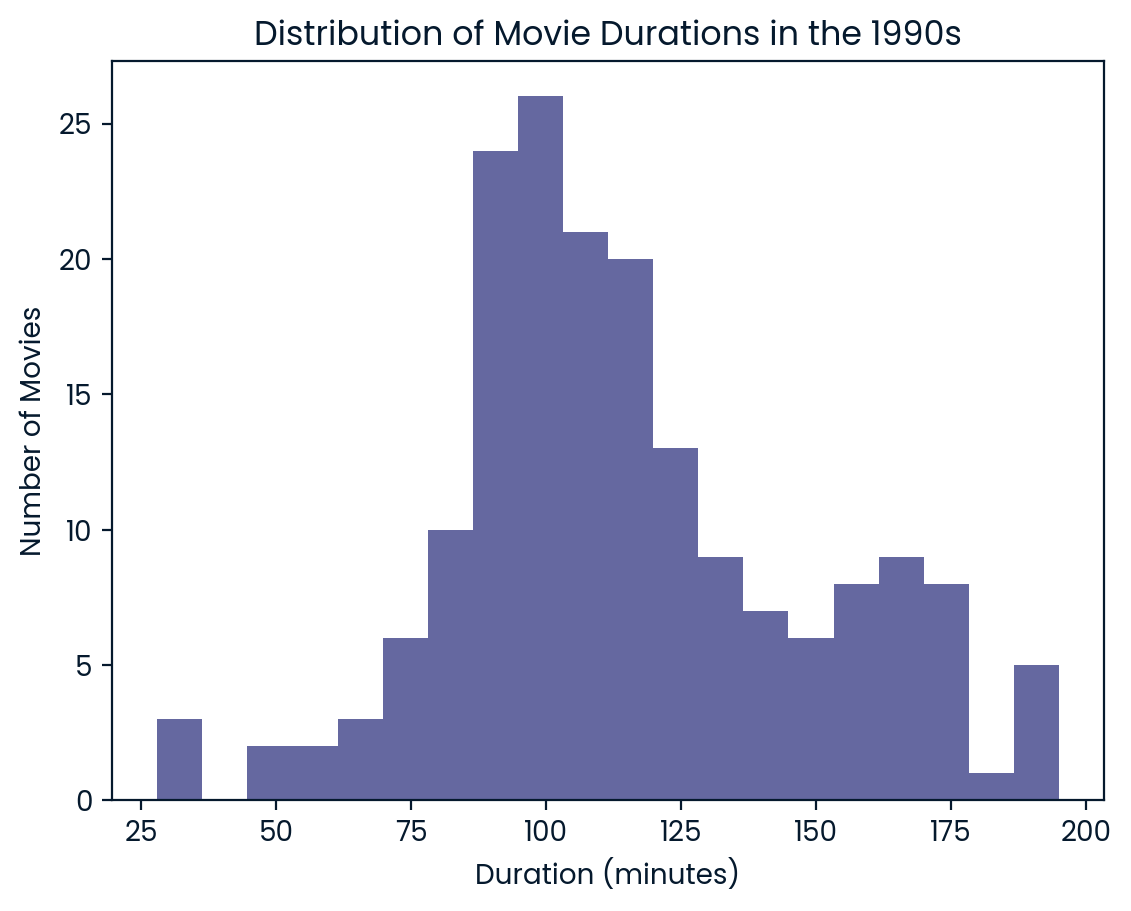

7

In [15]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

# Filter to keep only movies released in the 1990s
movies_1990s = netflix_subset[(netflix_subset["release_year"] >= 1990) & (netflix_subset["release_year"] < 2000)]

# Ensure 'duration' is string before using .str methods
duration_str = movies_1990s["duration"].astype(str)
movies_1990s["duration_min"] = pd.to_numeric(duration_str.str.extract(r'(\d+)')[0])

# Visualize the duration column of your filtered data to see the distribution of movie durations
plt.hist(movies_1990s["duration_min"].dropna(), bins=20)
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

# Save the most common duration value (approximate by mode)
duration = movies_1990s["duration_min"].mode()[0]

# Filter the data again to keep only the Action movies
action_movies_1990s = movies_1990s[movies_1990s["genre"] == "Action"]

# Use a for loop and a counter to count how many short action movies there were in the 1990s
short_movie_count = 0

for label, row in action_movies_1990s.iterrows():
    if row["duration_min"] < 90:
        short_movie_count += 1

short_movie_count

# Alternatively, using .sum():
# (action_movies_1990s["duration_min"] < 90).sum()